## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE

df = pd.read_csv("data\LeMonde2003_9classes.csv")
df.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


<Axes: xlabel='category', ylabel='Count'>

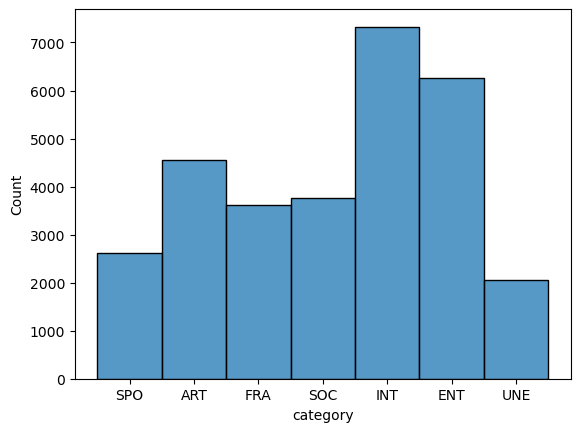

In [2]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.histplot(df["category"])

In [142]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

df['text'].sample(n=5, random_state=123)

24745                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

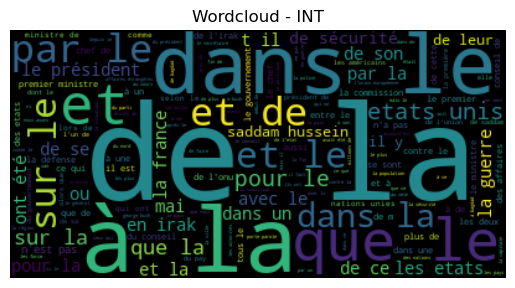

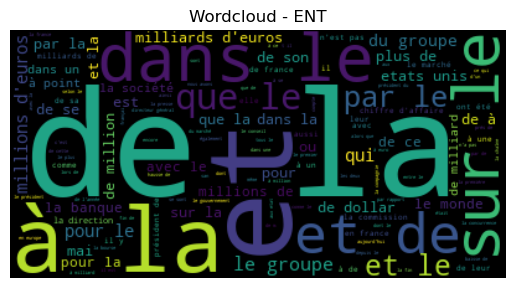

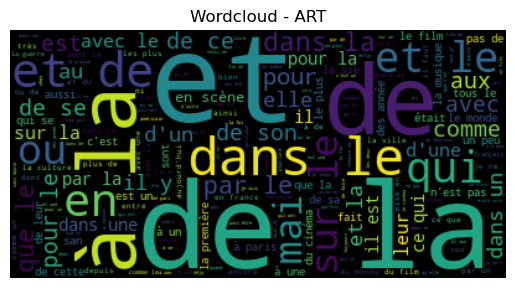

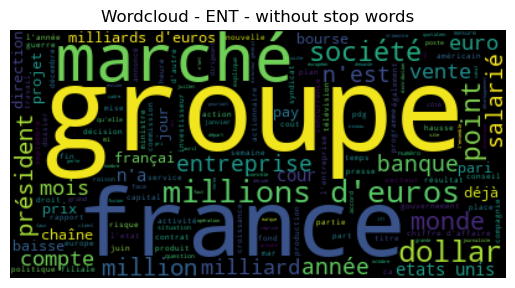

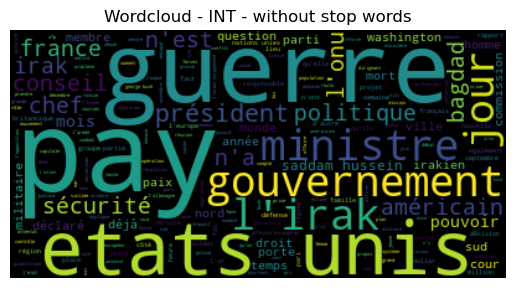

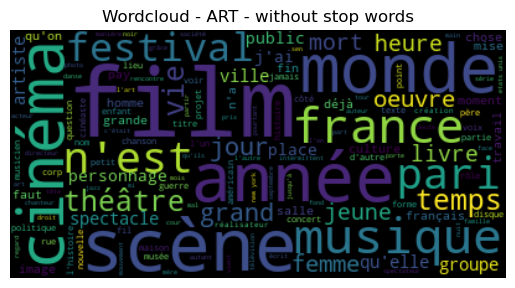

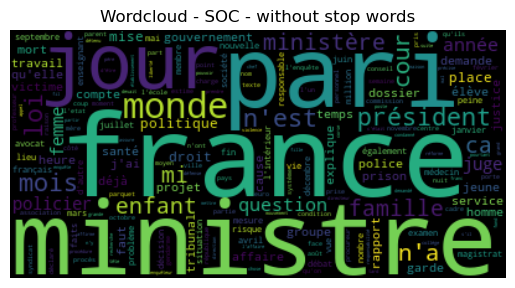

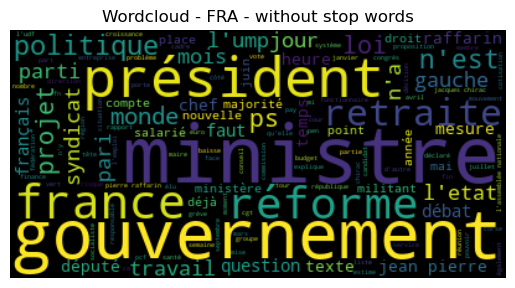

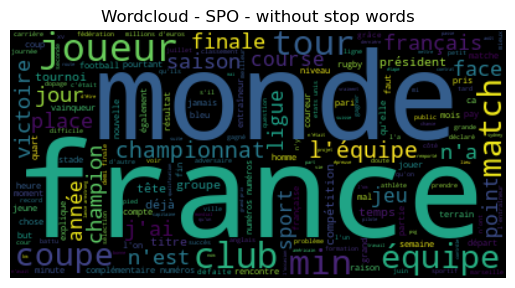

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Display one wordcloud for each of the most frequent classes
most_frequent_classes = ['INT', 'ENT', 'ART'] 

for categ in most_frequent_classes:
    corpus = df[df["category"]==categ]["text"]
    text = " ".join(article for article in corpus)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Wordcloud - {}".format(categ))
    plt.axis("off")
    plt.show()

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA', 'SPO']:
    corpus = df[df["category"]==cat]["text"]
    text = " ".join(article for article in corpus)
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Wordcloud - {} - without stop words".format(cat))
    plt.axis("off")
    plt.show()
 # YOUR CODE HERE

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE

X = df["text"].values
y = df["category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1, random_state = 123)

In [15]:
import numpy as np
print("Train")
uniques, counts = np.unique(y_train, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(y_train)))
print({k: v for k, v in sorted(percentages.items(), key=lambda item: item[1])})
print("Val")
uniques, counts = np.unique(y_val, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(y_val)))
print({k: v for k, v in sorted(percentages.items(), key=lambda item: item[1])})
print("Test")
uniques, counts = np.unique(y_test, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(y_test)))
print({k: v for k, v in sorted(percentages.items(), key=lambda item: item[1])})

Train
{'UNE': 6.814554086686039, 'SPO': 8.644046985634183, 'FRA': 11.987885237179224, 'SOC': 12.446281668235583, 'ART': 15.090246797364221, 'ENT': 20.721974378913764, 'INT': 24.295010845986983}
Val
{'UNE': 6.813996316758748, 'SPO': 8.655616942909761, 'FRA': 11.970534069981584, 'SOC': 12.449355432780846, 'ART': 15.101289134438305, 'ENT': 20.736648250460405, 'INT': 24.27255985267035}
Test
{'UNE': 6.794829300629765, 'SPO': 8.650977792509115, 'FRA': 11.998674179648658, 'SOC': 12.462711302618494, 'ART': 15.081206496519721, 'ENT': 20.71594298972489, 'INT': 24.295657938349354}


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
MAX_FEATURES = 1000
vectorizer = CountVectorizer(max_features = MAX_FEATURES)
# fit on train data
X_train_transform = vectorizer.fit_transform(X_train)
# apply it on train and dev data
X_val_transform = vectorizer.transform(X_val)
X_test_transform = vectorizer.transform(X_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_transform, y_train)
# Evaluate
print("Train score: {}".format(clf.score(X_train_transform, y_train)))
print("Val score: {}".format(clf.score(X_val_transform, y_val)))
print("Test score: {}".format(clf.score(X_test_transform, y_test)))

Train score: 0.7299553882044776
Val score: 0.7281767955801105
Test score: 0.7282068279748094


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

dico_train_score = {}
dico_val_score = {}
dico_test_score = {}

MAX_FEATURES_TF = 132400
for max_feat in range(10000, MAX_FEATURES_TF, 10000):
    print("Max features : {}".format(max_feat))
    pipeline = Pipeline([('count_vec', CountVectorizer(max_features=max_feat)),
                        ('tf_transformer', TfidfTransformer()),
                        ('classifier', MultinomialNB())])
    # Train 
    pipeline.fit(X_train, y_train)
    # Eval
    train_score = pipeline.score(X_train, y_train)
    val_score = pipeline.score(X_val, y_val)
    test_score = pipeline.score(X_test, y_test)

    dico_train_score[max_feat] = train_score
    dico_val_score[max_feat] = val_score
    dico_test_score[max_feat] = test_score

Max features : 10000
Max features : 20000
Max features : 30000
Max features : 40000
Max features : 50000
Max features : 60000
Max features : 70000
Max features : 80000
Max features : 90000
Max features : 100000
Max features : 110000
Max features : 120000
Max features : 130000


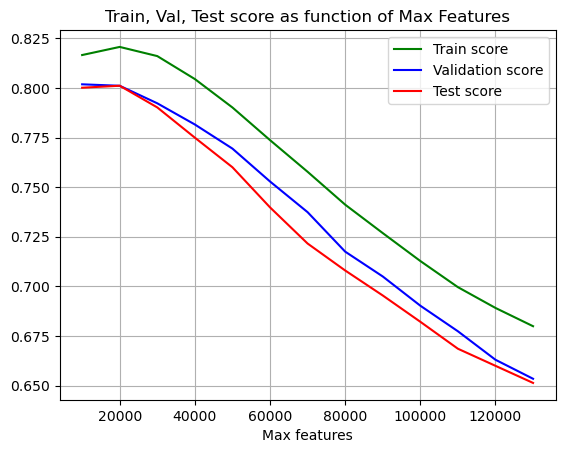

In [21]:
plt.figure()
plt.plot(list(dico_train_score.keys()), list(dico_train_score.values()), color='green', label="Train score")
plt.plot(list(dico_val_score.keys()), list(dico_val_score.values()), color='blue', label="Validation score")
plt.plot(list(dico_test_score.keys()), list(dico_test_score.values()), color='red', label="Test score")
plt.xlabel('Max features')
plt.grid()
plt.legend()
plt.title("Train, Val, Test score as function of Max Features")
plt.show()

In [23]:
dico_train_score_2 = {}
dico_val_score_2 = {}
dico_test_score_2 = {}

for max_feat in range(1000, 21000, 1000):
    print("Max features : {}".format(max_feat))
    pipeline = Pipeline([('count_vec', CountVectorizer(max_features=max_feat)),
                        ('tf_transformer', TfidfTransformer()),
                        ('classifier', MultinomialNB())])
    # Train 
    pipeline.fit(X_train, y_train)
    # Eval
    train_score = pipeline.score(X_train, y_train)
    val_score = pipeline.score(X_val, y_val)
    test_score = pipeline.score(X_test, y_test)

    dico_train_score_2[max_feat] = train_score
    dico_val_score_2[max_feat] = val_score
    dico_test_score_2[max_feat] = test_score

Max features : 1000
Max features : 2000
Max features : 3000
Max features : 4000
Max features : 5000
Max features : 6000
Max features : 7000
Max features : 8000
Max features : 9000
Max features : 10000
Max features : 11000
Max features : 12000
Max features : 13000
Max features : 14000
Max features : 15000
Max features : 16000
Max features : 17000
Max features : 18000
Max features : 19000
Max features : 20000


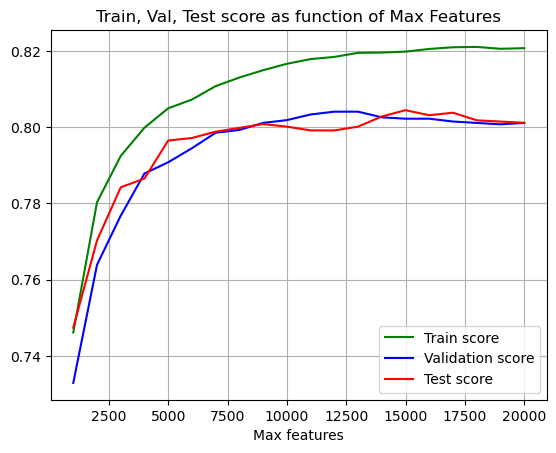

In [25]:
plt.figure()
plt.plot(list(dico_train_score_2.keys()), list(dico_train_score_2.values()), color='green', label="Train score")
plt.plot(list(dico_val_score_2.keys()), list(dico_val_score_2.values()), color='blue', label="Validation score")
plt.plot(list(dico_test_score_2.keys()), list(dico_test_score_2.values()), color='red', label="Test score")
plt.xlabel('Max features')
plt.grid()
plt.legend()
plt.title("Train, Val, Test score as function of Max Features")
plt.show()

In [27]:
dico_train_score_3 = {}
dico_val_score_3 = {}
dico_test_score_3 = {}

for max_feat in range(10000, 17600, 100):
    print("Max features : {}".format(max_feat))
    pipeline = Pipeline([('count_vec', CountVectorizer(max_features=max_feat)),
                        ('tf_transformer', TfidfTransformer()),
                        ('classifier', MultinomialNB())])
    # Train 
    pipeline.fit(X_train, y_train)
    # Eval
    train_score = pipeline.score(X_train, y_train)
    val_score = pipeline.score(X_val, y_val)
    test_score = pipeline.score(X_test, y_test)

    dico_train_score_3[max_feat] = train_score
    dico_val_score_3[max_feat] = val_score
    dico_test_score_3[max_feat] = test_score

Max features : 10000
Max features : 10100
Max features : 10200
Max features : 10300
Max features : 10400
Max features : 10500
Max features : 10600
Max features : 10700
Max features : 10800
Max features : 10900
Max features : 11000
Max features : 11100
Max features : 11200
Max features : 11300
Max features : 11400
Max features : 11500
Max features : 11600
Max features : 11700
Max features : 11800
Max features : 11900
Max features : 12000
Max features : 12100
Max features : 12200
Max features : 12300
Max features : 12400
Max features : 12500
Max features : 12600
Max features : 12700
Max features : 12800
Max features : 12900
Max features : 13000
Max features : 13100
Max features : 13200
Max features : 13300
Max features : 13400
Max features : 13500
Max features : 13600
Max features : 13700
Max features : 13800
Max features : 13900
Max features : 14000
Max features : 14100
Max features : 14200
Max features : 14300
Max features : 14400
Max features : 14500
Max features : 14600
Max features 

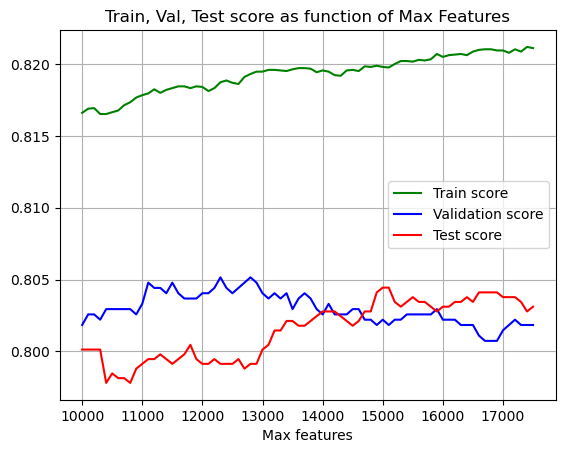

In [28]:
plt.figure()
plt.plot(list(dico_train_score_3.keys()), list(dico_train_score_3.values()), color='green', label="Train score")
plt.plot(list(dico_val_score_3.keys()), list(dico_val_score_3.values()), color='blue', label="Validation score")
plt.plot(list(dico_test_score_3.keys()), list(dico_test_score_3.values()), color='red', label="Test score")
plt.xlabel('Max features')
plt.grid()
plt.legend()
plt.title("Train, Val, Test score as function of Max Features")
plt.show()

In [29]:
best_param = max(dico_test_score_3, key=lambda k: dico_test_score_3[k])
print("Max feature with max test score: {}".format(best_param))
print("Best test score: {}".format(dico_test_score_3[best_param]))

Max feature with max test score: 15000
Best test score: 0.8044414981769971


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Validation set
              precision    recall  f1-score   support

         ART       0.82      0.90      0.86       410
         ENT       0.85      0.92      0.88       563
         FRA       0.67      0.76      0.71       325
         INT       0.81      0.92      0.86       659
         SOC       0.74      0.68      0.71       338
         SPO       0.93      0.88      0.91       235
         UNE       0.00      0.00      0.00       185

    accuracy                           0.80      2715
   macro avg       0.69      0.72      0.70      2715
weighted avg       0.75      0.80      0.77      2715



c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


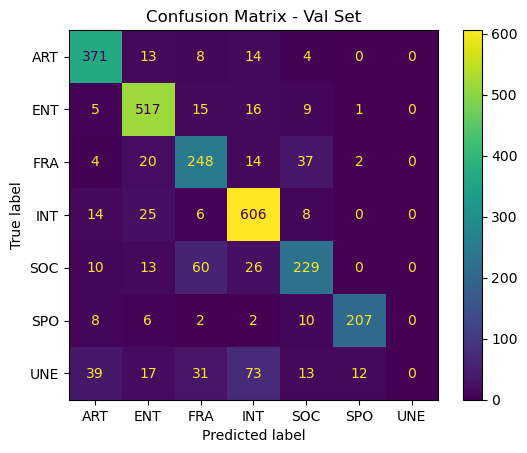

Test set
              precision    recall  f1-score   support

         ART       0.81      0.90      0.86       455
         ENT       0.83      0.92      0.87       625
         FRA       0.67      0.77      0.71       362
         INT       0.82      0.92      0.87       733
         SOC       0.76      0.71      0.73       376
         SPO       0.95      0.85      0.90       261
         UNE       0.00      0.00      0.00       205

    accuracy                           0.80      3017
   macro avg       0.69      0.72      0.71      3017
weighted avg       0.75      0.80      0.78      3017



c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


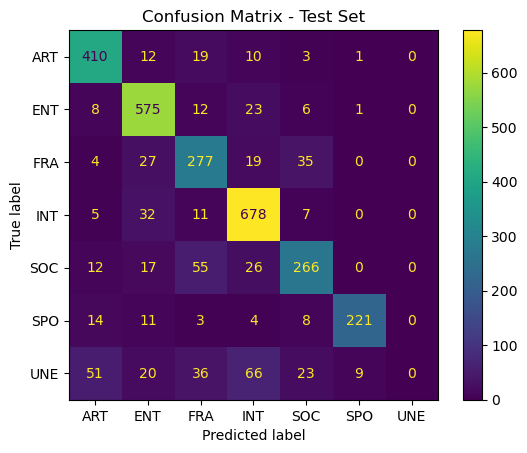

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# YOUR CODE HERE

pipeline = Pipeline([('count_vec', CountVectorizer(max_features=best_param)),
                    ('tf_transformer', TfidfTransformer()),
                    (('classifier', MultinomialNB()))])

pipeline.fit(X_train, y_train)

y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

print("Validation set")
# Report
print(classification_report(y_val, y_pred_val))
# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val, labels=pipeline["classifier"].classes_)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val,
                                  display_labels=pipeline["classifier"].classes_)
disp_val.plot()
plt.title("Confusion Matrix - Val Set")
plt.show()

print("Test set")
# Report
print(classification_report(y_test, y_pred_test))
# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipeline["classifier"].classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=pipeline["classifier"].classes_)
disp_test.plot()
plt.title("Confusion Matrix - Test Set")
plt.show()

* Les classes ART (Art), ENT (Entreprises), INT (International) et SPO (Sport) sont celles avec le meilleure F1-score. On peut supposer que le résultat découle du fait que les classes INT, ENT et ART soient sur-représentées dans l'échantillon. Quant à la catégorie SPO, on remarque dans le Wordcloud que les textes associés contiennent des mots assez spécifiques comme "joueur" ou "club". Bien que "france" soit aussi un mot très fréquent dans cette catégorie, pouvant prêter à confusion, le score TF-IDF relatif au terme est vraisemblablement faible dans la mesure où "france" est un mot très présent dans les catégories SOC et ART.

* D'après la matrice de confusion, le modèle n'arrive pas catégoriser les articles avec le label "UNE" comme tel (articles à la une). Le problème avec cette catégorie est qu'elle n'est pas exclusive aux autres. Un article peut par exemple être à la une et traiter d'un sujet international. Bien que le dataset et le modèle utilisé correspondent à un problème de classification multi-class, en réalité, le problème rencontré est plutôt de type multi-labels. On remarque aussi qu'un nombre non-négligeable d'articles de catégorie "FRA" sont classés comme "SOC" et inversement. Comme en témoignent les Wordclouds, ces catégories sont proches en termes de vocabulaire employé.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

C:\Users\yanis\AppData\Local\Temp\ipykernel_10648\2663973387.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df["category"] == "FRA", "category"] = "FRA_SOC"
C:\Users\yanis\AppData\Local\Temp\ipykernel_10648\2663973387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df["category"] == "SOC", "category"] = "FRA_SOC"


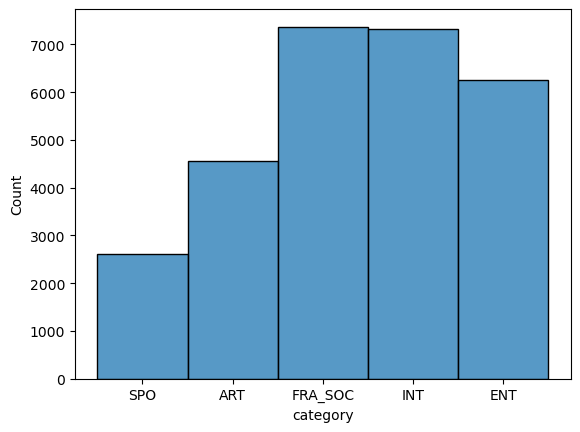

Validation set
              precision    recall  f1-score   support

         ART       0.85      0.81      0.83       410
         ENT       0.82      0.84      0.83       563
     FRA_SOC       0.77      0.87      0.81       663
         INT       0.88      0.87      0.87       659
         SPO       0.99      0.69      0.82       235

    accuracy                           0.84      2530
   macro avg       0.86      0.82      0.83      2530
weighted avg       0.84      0.84      0.84      2530



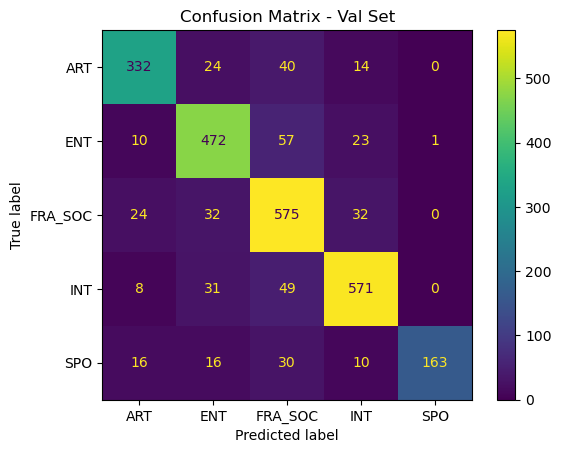

Test set
              precision    recall  f1-score   support

         ART       0.85      0.85      0.85       455
         ENT       0.82      0.83      0.82       625
     FRA_SOC       0.75      0.89      0.81       737
         INT       0.88      0.82      0.85       733
         SPO       0.98      0.64      0.78       261

    accuracy                           0.83      2811
   macro avg       0.85      0.81      0.82      2811
weighted avg       0.84      0.83      0.83      2811



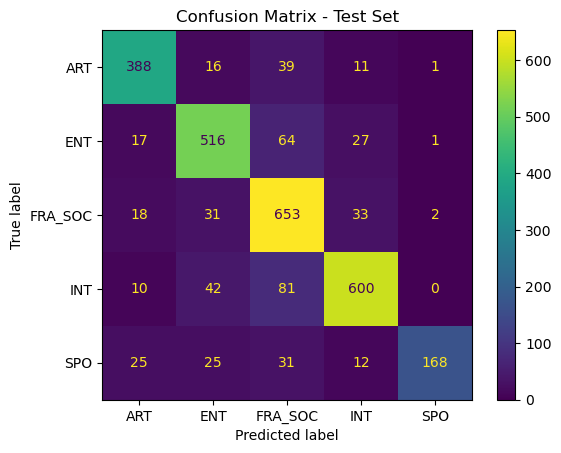

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
new_df = df[df["category"]!="UNE"]
new_df.loc[new_df["category"] == "FRA", "category"] = "FRA_SOC"
new_df.loc[new_df["category"] == "SOC", "category"] = "FRA_SOC"
# Plot the statistics of classes
sns.histplot(new_df["category"])
plt.show()
# Make the splits and print the sizes for checking
X = new_df["text"].values
y = new_df["category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1, random_state = 123)
# Apply TfidfVectorizer
# Train MultinomialNB
pipeline = Pipeline([("transformer", TfidfVectorizer(max_features = 1000)),
                     ("classifier", MultinomialNB())])
pipeline.fit(X_train, y_train)

y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

print("Validation set")
# Report
print(classification_report(y_val, y_pred_val))
# Confusion Matrix
cm_val = confusion_matrix(y_val, y_pred_val, labels=pipeline["classifier"].classes_)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val,
                                  display_labels=pipeline["classifier"].classes_)
disp_val.plot()
plt.title("Confusion Matrix - Val Set")
plt.show()

print("Test set")
# Report
print(classification_report(y_test, y_pred_test))
# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipeline["classifier"].classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=pipeline["classifier"].classes_)
disp_test.plot()
plt.title("Confusion Matrix - Test Set")
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

### Choix du modèle

Beaucoup de modèles zero-shot learning ont été entrainés exclusivement sur des textes anglais. Nous choisissons alors une version multilingue du modèle DeBERTa-v3-base (une variante de BERT): multiDeBERTa-v3-base. Ce modèle a été entrainté sur 26 langues différentes, dont le français.

In [53]:
from transformers import pipeline
model = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
pipe = pipeline(task='zero-shot-classification', model=model, tokenizer=model)

### Choix de formulation des classes

Nous écrivons les classes en langage naturel. Nous redéfinissons le template par défaut en le remplaçant par un template français.

In [59]:
topics = ['Sport', 'Art', 'France et Société', 'International', 'Entreprises']
template_fr = 'Ce Thème est {}'

### Prédiction pour un texte

Le modèle prédit correctement la catégorie "Sport" pour le texte associé. La présence du nom de club "fulham fc" doit aider à cette tâche. La catégorie "Art" doit arriver en deuxième en raison de la présence du terme "portrait". Enfin, "Entreprises" arrive sûrement en troisième position suite à la présence des mots "boutique" et "magasin".

In [62]:
test_txt = X[0][0:100]
prediction = pipe(test_txt, topics, hypothesis_template=template_fr)
print(f'Zero-shot prediction for: \n {prediction["sequence"]}')
top_3 = zip(prediction['labels'][0:3], prediction['scores'][0:3])
for label, score in top_3:
    print(f'{label} - {score:.2%}')

Zero-shot prediction for: 
 a la boutique du fulham fc nichée au dernier étage du grand magasin harrods le portrait de mohammed 
Sport - 57.21%
Art - 24.30%
Entreprises - 14.28%


## Evaluation des performances sur 100 articles

In [108]:
def zero_shot_predict(X):
    list_pred = []
    for text in X:
        prediction = pipe(text, topics, hypothesis_template=template_fr)
        y_pred = prediction['labels'][0]
        if y_pred == 'Sport':
            y_pred_encode = 'SPO'
        elif y_pred == 'Art':
            y_pred_encode = 'ART'
        elif y_pred == 'France et Société':
            y_pred_encode = 'FRA_SOC'
        elif y_pred == 'International':
            y_pred_encode = 'INT'
        elif y_pred == 'Entreprises':
            y_pred_encode = 'ENT'
        list_pred.append(y_pred_encode)

    return np.array(list_pred)

In [130]:
np.random.seed(123)
indexes = np.random.choice(X_test.shape[0], 100, replace=False)

articles_set = X_test[indexes]
labels_set = y_test[indexes]

In [131]:
%%time
LENGTH_ARTICLE = 100
articles_set_pad = np.array([article[0:LENGTH_ARTICLE] for article in articles_set])
y_pred_set = zero_shot_predict(articles_set_pad)
print(classification_report(labels_set, y_pred_set))

              precision    recall  f1-score   support

         ART       0.50      0.12      0.20        16
         ENT       0.39      0.62      0.48        21
     FRA_SOC       0.57      0.20      0.30        20
         INT       0.57      0.83      0.68        24
         SPO       0.76      0.84      0.80        19

    accuracy                           0.55       100
   macro avg       0.56      0.52      0.49       100
weighted avg       0.56      0.55      0.51       100

CPU times: total: 11min 12s
Wall time: 2min 42s


In [132]:
%%time
LENGTH_ARTICLE = 500
articles_set_pad = np.array([article[0:LENGTH_ARTICLE] for article in articles_set])
y_pred_set_2 = zero_shot_predict(articles_set_pad)
print(classification_report(labels_set, y_pred_set_2))

              precision    recall  f1-score   support

         ART       0.88      0.44      0.58        16
         ENT       0.56      0.71      0.63        21
     FRA_SOC       0.50      0.35      0.41        20
         INT       0.62      0.75      0.68        24
         SPO       0.82      0.95      0.88        19

    accuracy                           0.65       100
   macro avg       0.67      0.64      0.64       100
weighted avg       0.66      0.65      0.64       100

CPU times: total: 24min 32s
Wall time: 6min 9s


In [143]:
%%time
y_pred_gaussian_nb = pipeline.predict(articles_set)
print(classification_report(labels_set, y_pred_gaussian_nb))

              precision    recall  f1-score   support

         ART       0.94      1.00      0.97        16
         ENT       0.86      0.86      0.86        21
     FRA_SOC       0.62      0.90      0.73        20
         INT       1.00      0.88      0.93        24
         SPO       1.00      0.63      0.77        19

    accuracy                           0.85       100
   macro avg       0.88      0.85      0.85       100
weighted avg       0.88      0.85      0.85       100

CPU times: total: 15.6 ms
Wall time: 28.4 ms


L'utilisation du zero-shot learning procure des résultats médiocres. On remarque que parmi l'ensemble des articles dont le thème est "France et Société", seul 35 % sont classés comme tel (pour une longueur d'article égale à 500). De plus, le temps de validation n'est pas négligeable.

Au global, le classifieur bayésien naïf procure de meilleurs résultats, hormis sur la catégorie "Sport", en matière de recall. Le coût computationnel associé à un tel modèle est aussi plus faible. Enfin, le classifieur bayésien naïf est aussi moins complexe. D'un côté, avec 1000 features lors du TF-IDF et 5 classes, le modèle comporte $2 \times 1000 \times 5 = 10 000 $ paramètres contre 279 millions pour le multiDeBERTa-v3-base .